In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from util import (get_wave_number, 
                  get_initial_guess, 
                  get_setup, 
                  get_accuracy, 
                  get_species,
                  write_input_data,
                  read_disp_data,
                 )
import subprocess

mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] = 3.5
mpl.rcParams['ytick.minor.size'] = 3.5
mpl.rcParams['xtick.major.width'] = 1.1
mpl.rcParams['ytick.major.width'] = 1.1
mpl.rcParams['xtick.minor.width'] = .8
mpl.rcParams['ytick.minor.width'] = .8
mpl.rcParams['legend.fontsize'] = 14
#xtick.major.size     : 3.5      # major tick size in points
#xtick.minor.size     : 2      # minor tick size in points
#xtick.major.width    : 0.8    # major tick width in points
#xtick.minor.width    : 0.6    # minor tick width in points
%matplotlib inline

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Verify Alfven wave dispersion in hydrogen plasma
$k$ is normalized by $kd_i = kv_A/\Omega_i = k\rho_i / \sqrt{\beta_i}$

In [3]:
kstart = .1
kend = .15
nk = 5
nspecies = 2
theta = 80
q_in = [1., -1.]
mu_in = [1., 1836.]
dens_in = [1., 1.]
drift_in = [0., 0.]
beta_para_in = [.01, .01]
beta_perp_in = [.01, .01]
kappa_in = [50, 50]
delta = 1e-4 # v_A/c

omega_r = kstart * np.cos(np.deg2rad(theta))
omega_i = 0
increment_r = 1e-5
increment_i = 1e-5

input_file_text = ''
input_file_text += get_wave_number(kstart, kend, nk)
input_file_text += get_initial_guess(omega_r=omega_r, 
                                     omega_i=omega_i, 
                                     increment_r=increment_r, 
                                     increment_i=increment_i
                                    )
input_file_text += get_setup(nspecies=nspecies, theta=theta, delta=delta)
input_file_text += get_accuracy()

for j in range(len(q_in)):
    input_file_text += get_species(
        q_in=q_in[j],
        mu_in=mu_in[j],
        dens_in=dens_in[j],
        drift_in=drift_in[j],
        beta_para_in=beta_para_in[j],
        beta_perp_in=beta_perp_in[j],
        kappa_in=kappa_in[j],
    )

In [4]:
write_input_data(input_file_text)

In [5]:
subprocess.run(["./dsolve"])

CompletedProcess(args=['./dsolve'], returncode=0)

In [6]:
disp = read_disp_data()

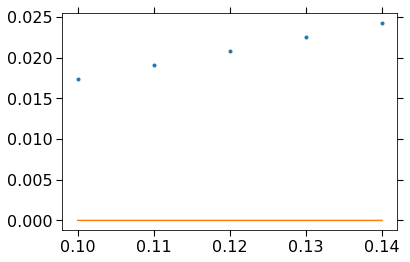

In [7]:
plt.plot(disp.k, disp.wr, '.')
plt.plot(disp.k, disp.wi)
plt.show()

In [8]:
disp

,k,wr,wi
0,0.10,0.017358,-1.745392e-07
1,0.11,0.019093,-2.322962e-07
2,0.12,0.020829,-3.015616e-07
3,0.13,0.022564,-3.833785e-07
4,0.14,0.024299,-4.787894e-07


# Verify Doppler shift trick works on Maxwellian distribution

In [114]:
kstart = .1
kend = .1
nk = 1
nspecies = 2
theta = 60
q_in = [1., -1.]
mu_in = [1., 1836.]
dens_in = [1., 1.]
drift_in = [0., 0.]
beta_para_in = [.01, .01]
beta_perp_in = [.01, .01]
kappa_in = [50, 50]
delta = 1e-4 # v_A/c

omega_r = kstart * np.cos(np.deg2rad(theta)) * (1 + drift_in[0])
omega_i = 0
increment_r = 1e-5
increment_i = 1e-5

input_file_text = ''
input_file_text += get_wave_number(kstart, kend, nk)
input_file_text += get_initial_guess(omega_r=omega_r, 
                                     omega_i=omega_i, 
                                     increment_r=increment_r, 
                                     increment_i=increment_i
                                    )
input_file_text += get_setup(nspecies=nspecies, theta=theta, delta=delta)
input_file_text += get_accuracy()

for j in range(len(q_in)):
    input_file_text += get_species(
        q_in=q_in[j],
        mu_in=mu_in[j],
        dens_in=dens_in[j],
        drift_in=drift_in[j],
        beta_para_in=beta_para_in[j],
        beta_perp_in=beta_perp_in[j],
        kappa_in=kappa_in[j],
    )

In [115]:
write_input_data(input_file_text)
subprocess.run(["./dsolve"])
disp = read_disp_data()

In [116]:
disp

,k,wr,wi
0,0.1,0.049906,-4.257827e-07


In [118]:
kstart = .1
kend = .1
nk = 1
nspecies = 2
theta = 60
q_in = [1., -1.]
mu_in = [1., 1836.]
dens_in = [1., 1.]
drift_in = [3., 3.]
beta_para_in = [.01, .01]
beta_perp_in = [.01, .01]
kappa_in = [50, 50]
delta = 1e-4 # v_A/c

omega_r = kstart * np.cos(np.deg2rad(theta)) * (1 + drift_in[0])
omega_i = 0
increment_r = 1e-5
increment_i = 1e-5

input_file_text = ''
input_file_text += get_wave_number(kstart, kend, nk)
input_file_text += get_initial_guess(omega_r=omega_r, 
                                     omega_i=omega_i, 
                                     increment_r=increment_r, 
                                     increment_i=increment_i
                                    )
input_file_text += get_setup(nspecies=nspecies, theta=theta, delta=delta)
input_file_text += get_accuracy()

for j in range(len(q_in)):
    input_file_text += get_species(
        q_in=q_in[j],
        mu_in=mu_in[j],
        dens_in=dens_in[j],
        drift_in=drift_in[j],
        beta_para_in=beta_para_in[j],
        beta_perp_in=beta_perp_in[j],
        kappa_in=kappa_in[j],
    )
    
write_input_data(input_file_text)
subprocess.run(["./dsolve"])
disp = read_disp_data()

disp

,k,wr,wi
0,0.1,0.199906,-4.257826e-07


# Verify core-halo drift electrons consistent with previous result

In [9]:
from py_vlasov.util import zp, kzkp, list_to_complex, real_imag
from py_vlasov.wrapper import oblique_wrapper, disp_det, input_gen
from py_vlasov.transport_ratios import transport_ratios
from py_vlasov.follow_parameter import follow_k

def generate_k_arr(start_k, target_k, log_incrmt = None, lin_incrmt = None):
    assert log_incrmt or lin_incrmt
    if log_incrmt:
        n = int(np.log(target_k/start_k) / np.log(1 + log_incrmt))
        ret = np.arange(n + 1) * np.log(1 + log_incrmt)
        return np.exp(ret)  * start_k
    else:
        n = (target_k - start_k) / lin_incrmt
        if n - int(n) > 1 - 1e-5:
            n = int(n) + 1
        return start_k + np.arange(n + 1) * lin_incrmt

In [10]:
aol = np.sqrt(1e-8)
print('aol = ', aol)
tc_tp = 2
th_tc = 6
nc_np = 0.95
nh_np = 1 - nc_np
vc_va = 2.5
vh_va = -vc_va * nc_np / nh_np
print('vh_va = {0:.3g}'.format(vh_va))

betap = .25
theta = 80


t_list=[1., tc_tp, th_tc * tc_tp]
a_list=[1., 1., 1.]
n_list=[1., nc_np, nh_np] 
q_list=[1.,-1., -1.]
m_list=[1., 1./1836., 1./1836]
v_list=[0., vc_va, vh_va]
n = 6
method = 'numpy'

k = 0.1

target_k = 3.

aol =  0.0001
vh_va = -47.5


In [11]:
kz, kp = kzkp(k, theta)
seed_freq = kz / np.sqrt(betap)

param = [kz, kp, betap, t_list, a_list, n_list, q_list,
         m_list, v_list, n, method, aol]

guess = seed_freq

freq = follow_k(guess, target_k, param,
                lin_incrmt = 0.02, incrmt_method = 'linear')  

In [12]:
k_arr = generate_k_arr(k, target_k, lin_incrmt=0.02)
wrel = np.array(freq[-1])

In [13]:
wrel[-1]

(0.8874770256513526-0.9381309617876353j)

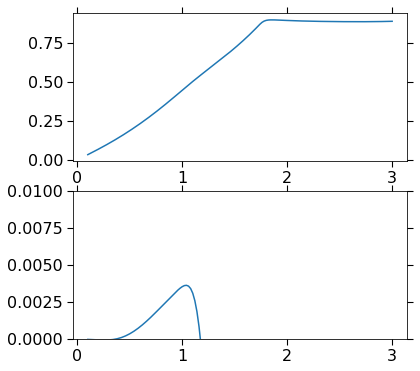

In [14]:
plt.figure(figsize=[6, 6])
plt.subplot(211)
plt.plot(k_arr, wrel.real)
plt.subplot(212)
plt.plot(k_arr, wrel.imag)
plt.ylim([0, .01])
plt.show()

### dshark

In [26]:
kstart = .1 / np.sqrt(betap)
kend = 3. / np.sqrt(betap)
nk = 50
nspecies = 3
theta = 80
q_in = np.array([1., -1., -1.])
mu_in = np.array([1., 1836., 1836.])
dens_in = np.array([1., .95, .05])
vdc_va = 2.5
drift_in = np.array([0., vdc_va, -dens_in[1]/dens_in[2]*vdc_va])
beta = .25
t_in = np.array([1, 2, 12])
beta_para_in = beta * t_in * dens_in
beta_perp_in = beta * t_in * dens_in
kappa_in = np.array([100, 100, 100])
delta = 1e-4 # v_A/c

omega_r = kstart * np.cos(np.deg2rad(theta)) * (1 + drift_in[0])
omega_i = -1e-6
increment_r = 0 # (kend - kstart) / nk * np.cos(np.deg2rad(theta))
increment_i = 0

input_file_text = ''
input_file_text += get_wave_number(kstart, kend, nk)
input_file_text += get_initial_guess(omega_r=omega_r, 
                                     omega_i=omega_i, 
                                     increment_r=increment_r, 
                                     increment_i=increment_i
                                    )
input_file_text += get_setup(nspecies=nspecies, theta=theta, delta=delta)
input_file_text += get_accuracy(rf_error=1e-4, eps_error=1e-6)

for j in range(len(q_in)):
    input_file_text += get_species(
        q_in=q_in[j],
        mu_in=mu_in[j],
        dens_in=dens_in[j],
        drift_in=drift_in[j],
        beta_para_in=beta_para_in[j],
        beta_perp_in=beta_perp_in[j],
        kappa_in=kappa_in[j],
    )
    
write_input_data(input_file_text)
subprocess.run(["./dsolve"])
disp = read_disp_data()

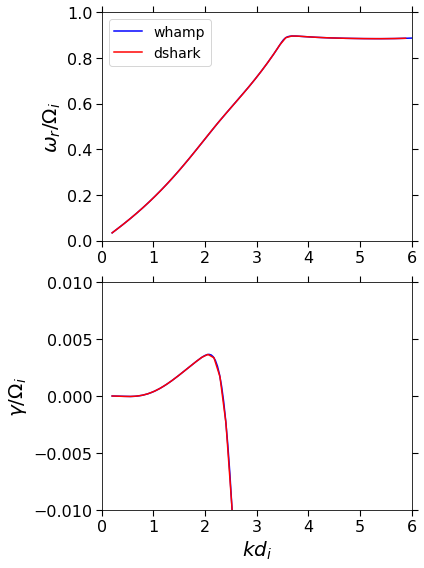

In [27]:
plt.figure(figsize=[6, 8])

plt.subplot(211)
plt.plot(k_arr / np.sqrt(beta), wrel.real, 'b', label='whamp')
plt.plot(disp.k , disp.wr, 'r', label='dshark')
plt.ylim([-.1, 1])
plt.xlim([0, 6])
plt.ylim([0, 1])
plt.ylabel(r'$\omega_r / \Omega_i$')
plt.legend(loc='upper left')

plt.subplot(212)
plt.plot(k_arr / np.sqrt(beta), wrel.imag, 'b')
plt.plot(disp.k, disp.wi, 'r')
plt.ylim([-1e-2, 1e-2])
plt.xlim([0, 6])
plt.ylabel(r'$\gamma / \Omega_i$')
plt.xlabel(r'$kd_i$')
plt.tight_layout()
# plt.savefig('alfven_wave_large_k.png', dpi=100)

In [28]:
disp.head(10)

,k,wr,wi
0,0.200,0.033764,-0.000007
1,0.316,0.053777,-0.000024
2,0.432,0.074343,-0.000043
3,0.548,0.095623,-0.000049
4,0.664,0.117746,-0.000022
5,0.780,0.140810,0.000055
6,0.896,0.164888,0.000193
7,1.012,0.190031,0.000397
8,1.128,0.216274,0.000664
9,1.244,0.243632,0.000986


# Verify kappa drift can be handled by Doppler shift trick

In [71]:
kstart = .1 / np.sqrt(betap)
kend = .5 / np.sqrt(betap)
nk = 50
nspecies = 3
theta = 80
q_in = np.array([1., -1., -1.])
mu_in = np.array([1., 1836., 1836.])
dens_in = np.array([1., .95, .05])
vdc_va = 2.5
vdh_va = -dens_in[1]/dens_in[2]*vdc_va
drift_in = np.array([-vdh_va, vdc_va-vdh_va, 0])
beta = .25
t_in = np.array([1, 2, 12])
beta_para_in = beta * t_in * dens_in
beta_perp_in = beta * t_in * dens_in
kappa_in = np.array([100, 100, 100])
delta = 1e-4 # v_A/c

omega_r = kstart * np.cos(np.deg2rad(theta)) * (1 + drift_in[0])
omega_i = -1e-6
increment_r = 0 # (kend - kstart) / nk * np.cos(np.deg2rad(theta))
increment_i = 0

input_file_text = ''
input_file_text += get_wave_number(kstart, kend, nk)
input_file_text += get_initial_guess(omega_r=omega_r, 
                                     omega_i=omega_i, 
                                     increment_r=increment_r, 
                                     increment_i=increment_i
                                    )
input_file_text += get_setup(nspecies=nspecies, theta=theta, delta=delta)
input_file_text += get_accuracy(rf_error=1e-4, eps_error=1e-6)

for j in range(len(q_in)):
    input_file_text += get_species(
        q_in=q_in[j],
        mu_in=mu_in[j],
        dens_in=dens_in[j],
        drift_in=drift_in[j],
        beta_para_in=beta_para_in[j],
        beta_perp_in=beta_perp_in[j],
        kappa_in=kappa_in[j],
    )
    
write_input_data(input_file_text)
subprocess.run(["./dsolve"])
disp = read_disp_data()
disp.wr = disp.wr - disp.k * np.cos(np.deg2rad(theta)) * drift_in[0]

In [72]:
disp

,k,wr,wi
0,0.200,0.033764,-0.000007
1,0.216,-0.036461,-0.000088
2,0.232,-0.039194,-0.000109
3,0.248,0.032599,-0.010192
4,0.264,0.044747,-0.000016
5,0.280,-0.047437,-0.000190
6,0.296,-0.050200,-0.000223
7,0.312,0.040871,-0.012865
8,0.328,0.055875,-0.000026
9,0.344,-0.058547,-0.000346


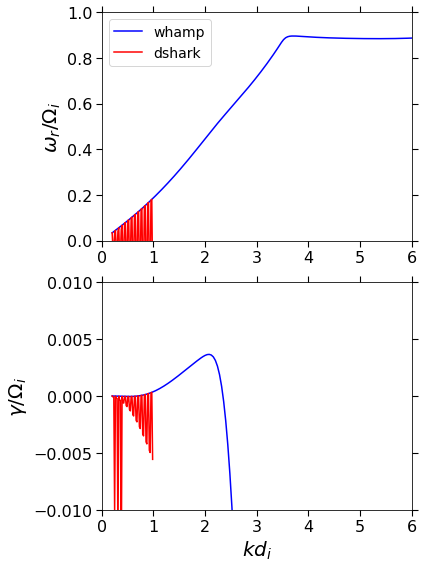

In [70]:
plt.figure(figsize=[6, 8])

plt.subplot(211)
plt.plot(k_arr / np.sqrt(beta), wrel.real, 'b', label='whamp')
plt.plot(disp.k , disp.wr, 'r', label='dshark')
plt.ylim([-.1, 1])
plt.xlim([0, 6])
plt.ylim([0, 1])
plt.ylabel(r'$\omega_r / \Omega_i$')
plt.legend(loc='upper left')

plt.subplot(212)
plt.plot(k_arr / np.sqrt(beta), wrel.imag, 'b')
plt.plot(disp.k, disp.wi, 'r')
plt.ylim([-1e-2, 1e-2])
plt.xlim([0, 6])
plt.ylabel(r'$\gamma / \Omega_i$')
plt.xlabel(r'$kd_i$')
plt.tight_layout()
# plt.savefig('alfven_wave_large_k.png', dpi=100)